In [0]:
import cv2
from PIL import Image

In [0]:
!wget https://www.123creative.com/2645-thickbox/us-license-plates-psd-badge-label-mark-design-template.jpg
img = Image.open('us-license-plates-psd-badge-label-mark-design-template.jpg')

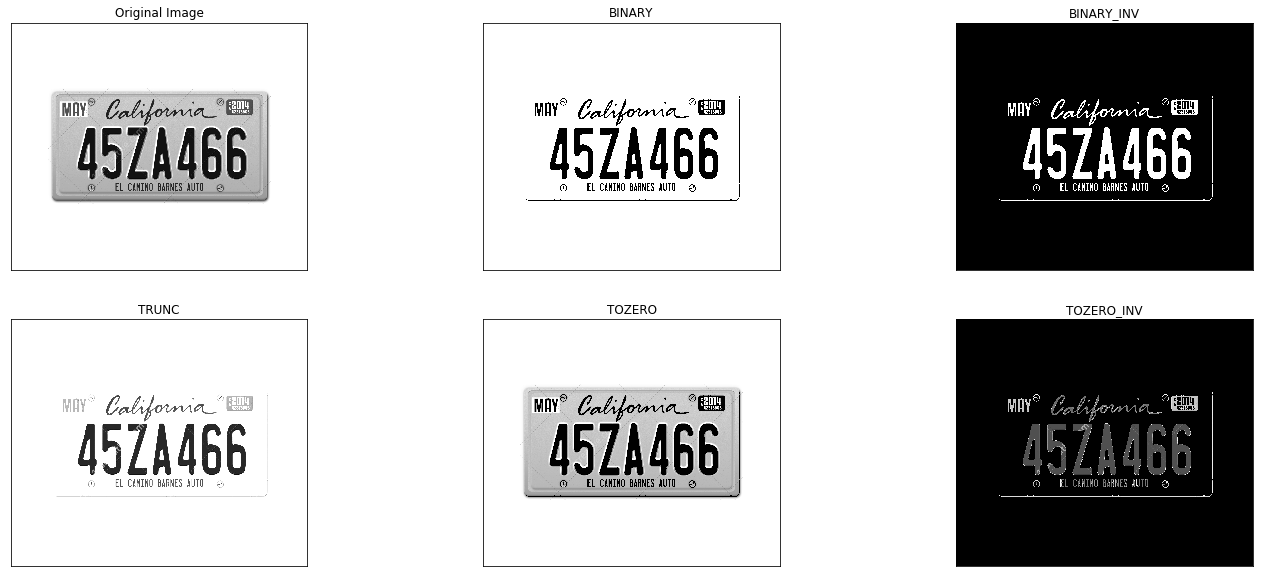

In [0]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('us-license-plates-psd-badge-label-mark-design-template.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(24,10))
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

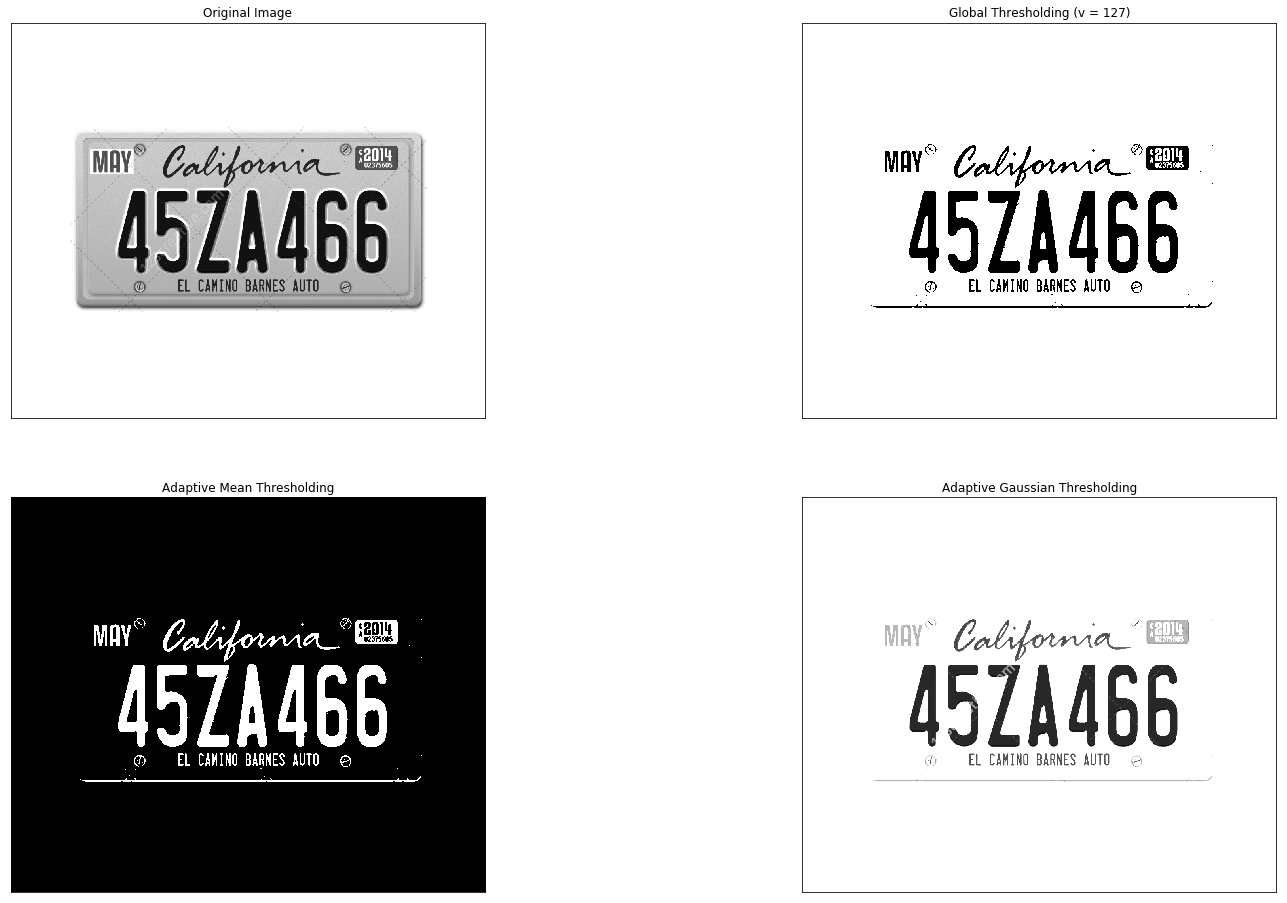

In [0]:
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
plt.figure(figsize=(26,16))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

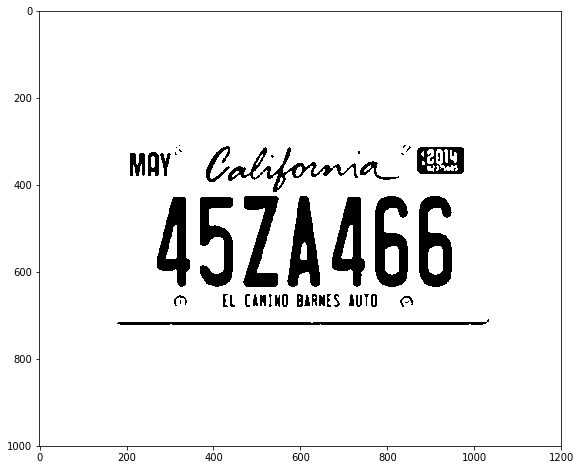

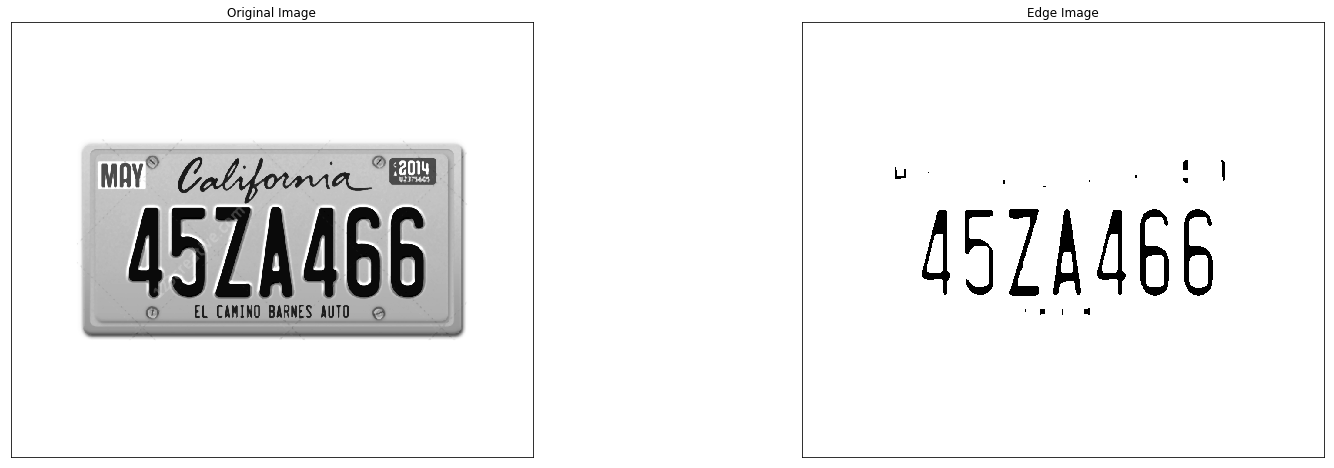

In [0]:
edges = cv2.medianBlur(th1,5)
plt.figure(figsize=(26,8))
plt.imshow(edges,cmap = 'gray')
for i in range(5):
  edges = cv2.erode(edges, None, iterations=2)
  edges = cv2.dilate(edges, None, iterations=4)
  edges = cv2.erode(edges, None, iterations=1)
plt.figure(figsize=(26,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

(8, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))
(250, 1200)
[0 1 2 3 4 5 6 7]


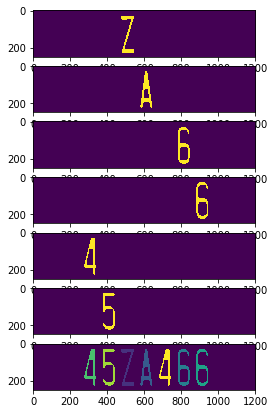

In [0]:
import cv2
import numpy as np

# img = cv2.imread('eGaIy.jpg', 0)
# img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
edges2 = ~ edges

edges2 = edges2[400:650,:]
ret, labels = cv2.connectedComponents(edges2)

print(ret,labels)
print(np.shape(labels))

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(edges2)


plt.figure(figsize=(26,8))
clusters = np.unique(labels)
print(clusters)
for i in clusters[1:]:
  fig1 = np.where(labels == clusters[i], 1, 0)
  plt.subplot(len(clusters),1,i)
  plt.imshow(fig1)


plt.imshow(labels)
plt.show()


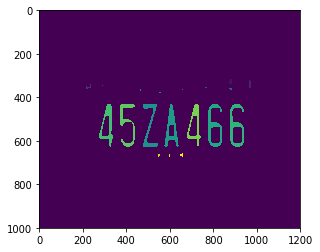

In [0]:
import pandas as pd
inversed_edges = ~ edges
N, output, stats, centroids = cv2.connectedComponentsWithStats(inversed_edges)
index = ['left_edge','top_edge','width','height','area']
stats = pd.DataFrame(data=stats,columns=index)
clusters = np.unique(output)


plt.imshow(output)

In [0]:
print(stats)
print(clusters)

    left_edge  top_edge  width  height     area
0           0         0   1200    1000  1164828
1         875       318     13      22      263
2         964       318      9      48      307
3         214       334     24      27      281
4         289       344      3       3        9
5         765       352      6       6       35
6         875       359     12      10      101
7         659       363      4       5       18
8         463       364      4       8       32
9         553       376      7       3       21
10        476       431     69     198     4439
11        577       431     65     197     5324
12        778       431     65     198     5210
13        878       431     66     198     5236
14        276       432     65     195     4600
15        374       432     66     196     4440
16        679       432     65     195     4490
17        513       659      3       8       24
18        547       659     11      14      138
19        598       659      3      14  

In [0]:
stats.iloc[7]

left_edge    659
top_edge     363
width          4
height         5
area          18
Name: 7, dtype: int32

In [0]:
big = stats.index[stats['area'] > 2000 ].tolist()


[0, 10, 11, 12, 13, 14, 15, 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0 10 11 12 13 14 15 16]


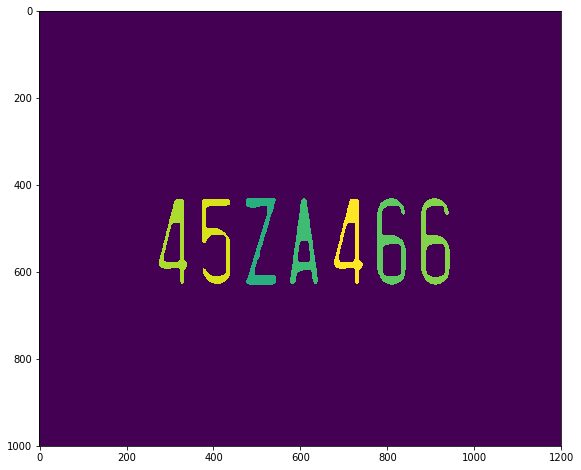

In [0]:
print(big)
print(np.unique(output))
clean = np.where(np.isin(output,big[1:]) , output, 0)
print(np.unique(clean))
plt.figure(figsize=(26,8))
plt.imshow(clean)
plt.show()

In [0]:
stats = stats.iloc[big]

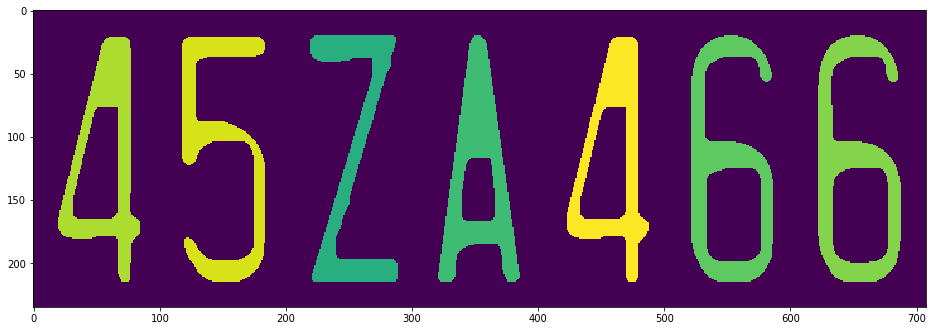

In [0]:

top = stats.loc[stats[1:]['top_edge'].idxmin()]['top_edge']
left = stats.loc[stats[1:]['left_edge'].idxmin()]['left_edge']
right = stats.loc[stats[1:]['left_edge'].idxmax()]['left_edge'] + stats.loc[stats[1:]['left_edge'].idxmax()]['width']
bottom = top + stats.loc[stats[1:]['top_edge'].idxmax()]['height']
padding = 20
padded = np.pad(clean[top:bottom,left:right],padding,'constant',constant_values=0)
plt.figure(figsize=(16,8))
plt.imshow(padded)
plt.show()

In [0]:
Image.fromarray((padded * 255).astype(np.uint8)).save('letters.jpg')